In [1]:
#load libraries
require(tidyr)
require(dplyr)
require(reshape2)
require(ggplot2)

Loading required package: tidyr

Loading required package: dplyr


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: reshape2


Attaching package: ‘reshape2’


The following object is masked from ‘package:tidyr’:

    smiths


Loading required package: ggplot2



In [2]:
# load pcr csv
pcr=read.csv("~/Documents/SCTLD/Coral_Code/NSF_Rapid/CBC_PCR_Plan/2_randomized_immune_metagenomics_PCR.csv")

In [3]:
head(pcr)

,X,Tubelabel_species,Health_Status,Date_Extracted,Raw_ng_ul,Extraction_physical_location,Date_Enriched,Microbe_Location,colony,Date_16S,Date_ITS2,X16S.double.band
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,1,052022_BEL_CBC_T1_2_SSID,Healthy,12_2_2024,7.73,"UML_NARWHAL_R2_B14, UML_NARWHAL_R2_B33",,,1_3,1_22_2025,6_26_2025,
2,2,092023_BEL_CBC_T1_175_PAST,Healthy,1_15_2025,2.3,UML_NARWHAL_R2_B15,,,1_13,1_22_2025,6_26_2025,y
3,3,092023_BEL_CBC_T1_175_PAST,Healthy,11_8_2024,0.14,UML_NARWHAL_R2_B12,,,1_13,1_22_2025,6_26_2025,y
4,4,022024_BEL_CBC_T3_851_PSTR,Healthy,11_26_2024,64.2,UML_NARWHAL_R2_B13,,,3_70,1_23_2025,6_26_2025,
5,5,082024_BEL_CBC_T4_1609_OFAV,Healthy,1_15_2025,61.2,UML_NARWHAL_R2_B15,,,4_78,1_23_2025,6_26_2025,y
6,6,122023_BEL_CBC_T3_526_SSID,Healthy,11_19_2024,16.4,UML_NARWHAL_R2_B13,,,3_5,1_23_2025,6_26_2025,


In [4]:
#changing X16S.double.band column to double
names(pcr)[names(pcr) == 'X16S.double.band'] <- 'double'

In [47]:
class(pcr$Date_16S)

[1] "character"

In [5]:
#isolate samples that have been through 16S pcr
pcr <- pcr %>%
  filter(!is.na(Date_16S) & Date_16S != "NA")

In [6]:
nrow(pcr)

[1] 126

In [7]:
#test the strsplit command to split my tube_label_species by underscore
testid = '052022_BEL_CBC_T1_2_SSID' 
tail(strsplit(testid, "_")[[1]], 1)

[1] "SSID"

In [8]:
# Create a new data frame with the species, date, and transect columns
pcr_split <- pcr %>%
  rowwise() %>%
  mutate(
    split_label = list(strsplit(Tubelabel_species, "_")[[1]]),
    date = split_label[1],
    transect = split_label[4],
    species = split_label[6]
  ) %>%
  ungroup() %>%
  select(-split_label)  # optional: remove the helper column

head(pcr_split, 10)

X,Tubelabel_species,Health_Status,Date_Extracted,Raw_ng_ul,Extraction_physical_location,Date_Enriched,Microbe_Location,colony,Date_16S,Date_ITS2,double,date,transect,species
<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,052022_BEL_CBC_T1_2_SSID,Healthy,12_2_2024,7.73,"UML_NARWHAL_R2_B14, UML_NARWHAL_R2_B33",,,1_3,1_22_2025,6_26_2025,,052022,T1,SSID
2,092023_BEL_CBC_T1_175_PAST,Healthy,1_15_2025,2.3,UML_NARWHAL_R2_B15,,,1_13,1_22_2025,6_26_2025,y,092023,T1,PAST
3,092023_BEL_CBC_T1_175_PAST,Healthy,11_8_2024,0.14,UML_NARWHAL_R2_B12,,,1_13,1_22_2025,6_26_2025,y,092023,T1,PAST
4,022024_BEL_CBC_T3_851_PSTR,Healthy,11_26_2024,64.2,UML_NARWHAL_R2_B13,,,3_70,1_23_2025,6_26_2025,,022024,T3,PSTR
5,082024_BEL_CBC_T4_1609_OFAV,Healthy,1_15_2025,61.2,UML_NARWHAL_R2_B15,,,4_78,1_23_2025,6_26_2025,y,082024,T4,OFAV
6,122023_BEL_CBC_T3_526_SSID,Healthy,11_19_2024,16.4,UML_NARWHAL_R2_B13,,,3_5,1_23_2025,6_26_2025,,122023,T3,SSID
7,112023_BEL_CBC_T4_399_MCAV,Healthy,11_15_2024,13.9,UML_NARWHAL_R2_B12,,,4_76,1_23_2025,6_26_2025,,112023,T4,MCAV
8,112023_BEL_CBC_T3_355_PSTR,Healthy,11_15_2024,1.27,UML_NARWHAL_R2_B12,,,3_70,1_23_2025,6_26_2025,,112023,T3,PSTR
9,082024_BEL_CBC_T3_1554_OANN,Healthy,1_15_2025,199.6,UML_NARWHAL_R2_B15,,,3_38,1_23_2025,6_27_2025,,082024,T3,OANN


In [9]:
#new col where double is in binary code
pcr_split <- pcr_split %>%
  mutate(double_binary = ifelse(double == "y", 1, 0))

In [10]:
#clean the dataframe to keep it organized

In [11]:
pcr_clean = pcr_split[c("Health_Status", "date", "transect", "species", "double_binary")]

In [27]:
#change date format for better plotting 
pcr_clean <- pcr_clean %>%
  mutate(
    month_year = format(as.Date(paste0("01", date), format = "%d%m%Y"), "%B %Y"),
    month_year = factor(month_year, levels = unique(month_year))  # ensures chronological order
  )

In [28]:
head(pcr_clean, 10)

Health_Status,date,transect,species,double_binary,month_year
<chr>,<date>,<chr>,<chr>,<dbl>,<fct>
Healthy,2022-05-01,T1,SSID,0,NA
Healthy,2023-09-01,T1,PAST,1,NA
Healthy,2023-09-01,T1,PAST,1,NA
Healthy,2024-02-01,T3,PSTR,0,NA
Healthy,2024-08-01,T4,OFAV,1,NA
Healthy,2023-12-01,T3,SSID,0,NA
Healthy,2023-11-01,T4,MCAV,0,NA
Healthy,2023-11-01,T3,PSTR,0,NA
Healthy,2024-08-01,T3,OANN,0,NA


In [ ]:
#now I have the x axes that I want to plot, which are health status date, transect and species
#y is whether or not I saw double banding for 16S

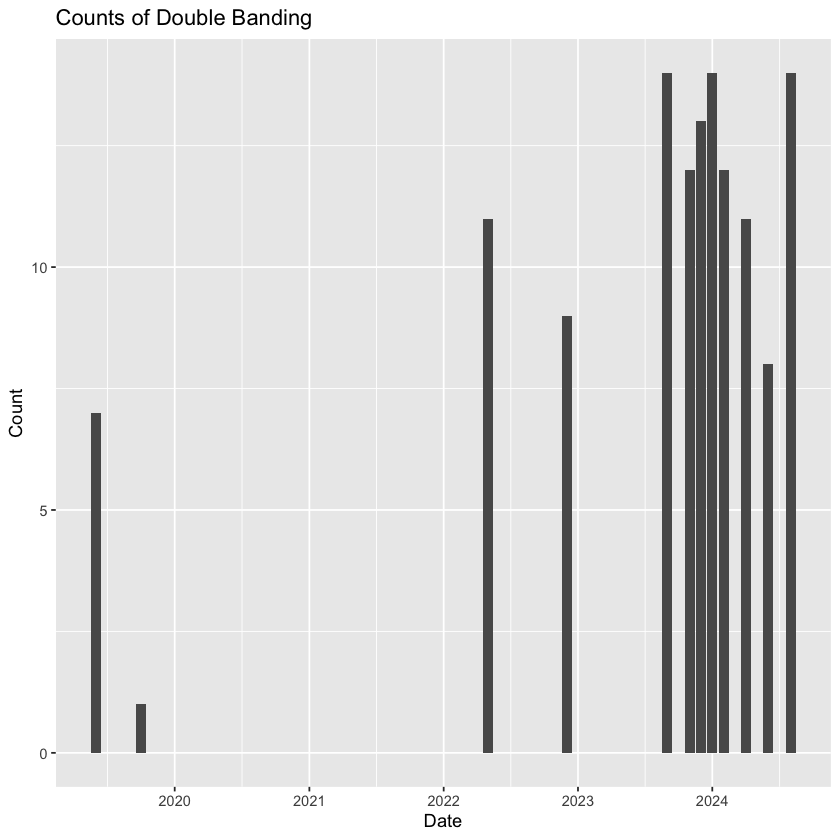

In [15]:
# Bar chart of counts
ggplot(pcr_clean, aes(x = date)) +
  geom_bar() +
  labs(title = "Counts of Double Banding", x = "Date", y = "Count")

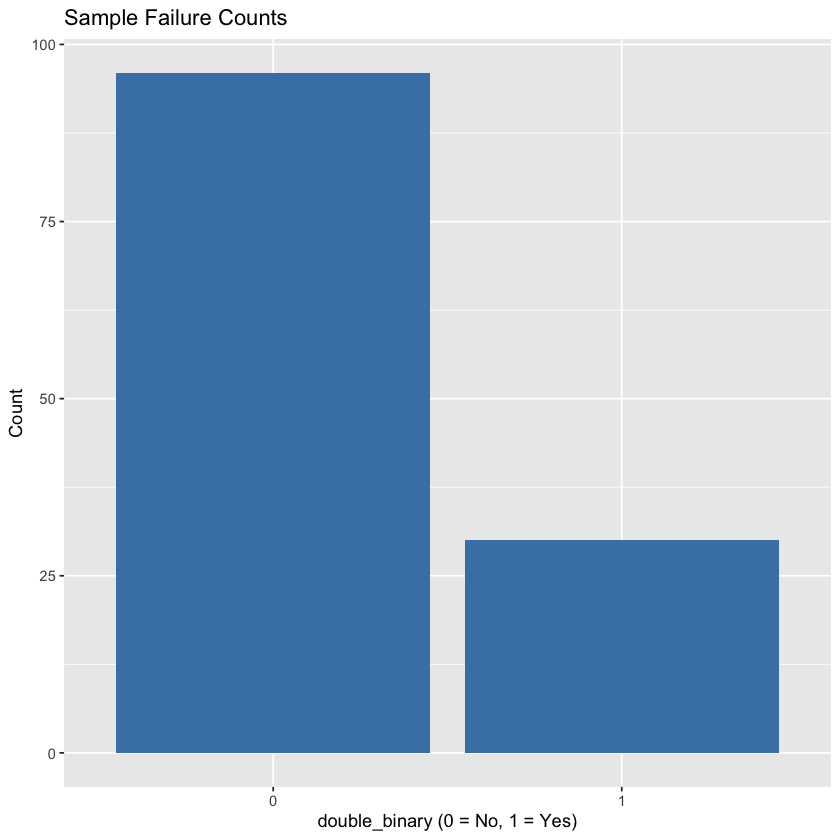

In [16]:
#basic plot count
ggplot(pcr_clean, aes(x = factor(double_binary))) +
  geom_bar(fill = "steelblue") +
  labs(x = "double_binary (0 = No, 1 = Yes)", y = "Count", title = "Sample Failure Counts")

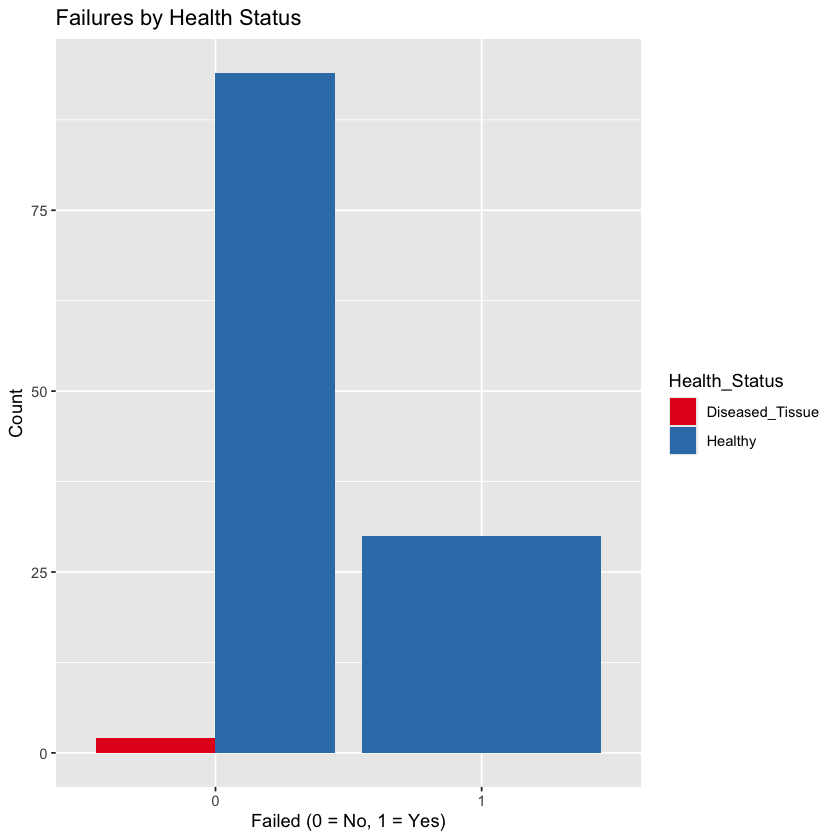

In [19]:
#counts broken down by health status
ggplot(pcr_clean, aes(x = factor(double_binary), fill = Health_Status)) +
  geom_bar(position = "dodge") +
  labs(x = "Failed (0 = No, 1 = Yes)", y = "Count", title = "Failures by Health Status") +
  scale_fill_brewer(palette = "Set1")

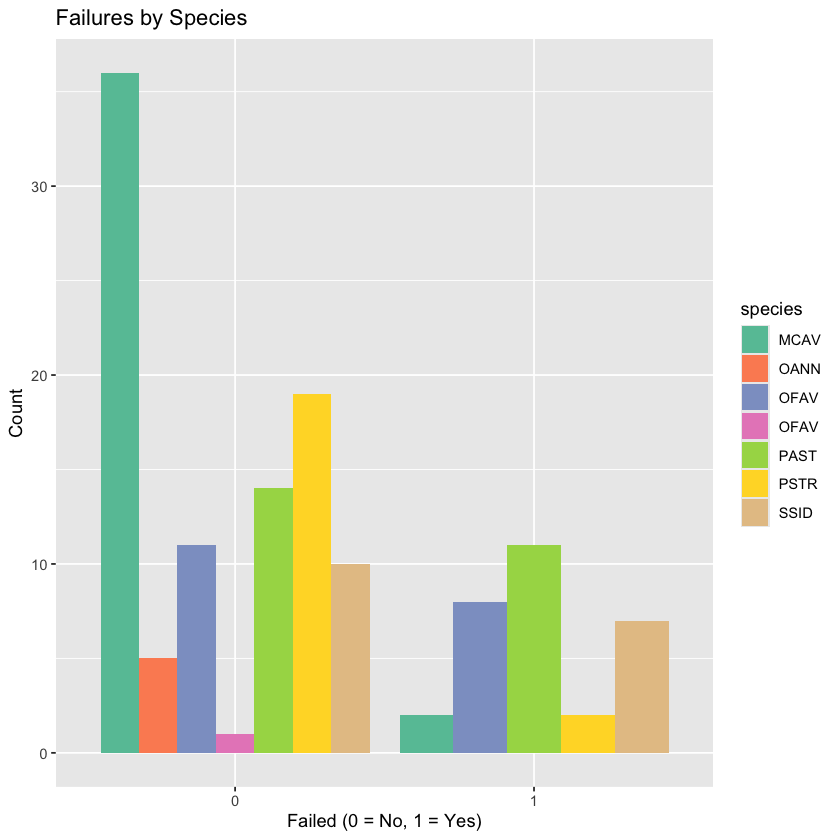

In [20]:
ggplot(pcr_clean, aes(x = factor(double_binary), fill = species)) +
  geom_bar(position = "dodge") +
  labs(x = "Failed (0 = No, 1 = Yes)", y = "Count", title = "Failures by Species") +
  scale_fill_brewer(palette = "Set2")

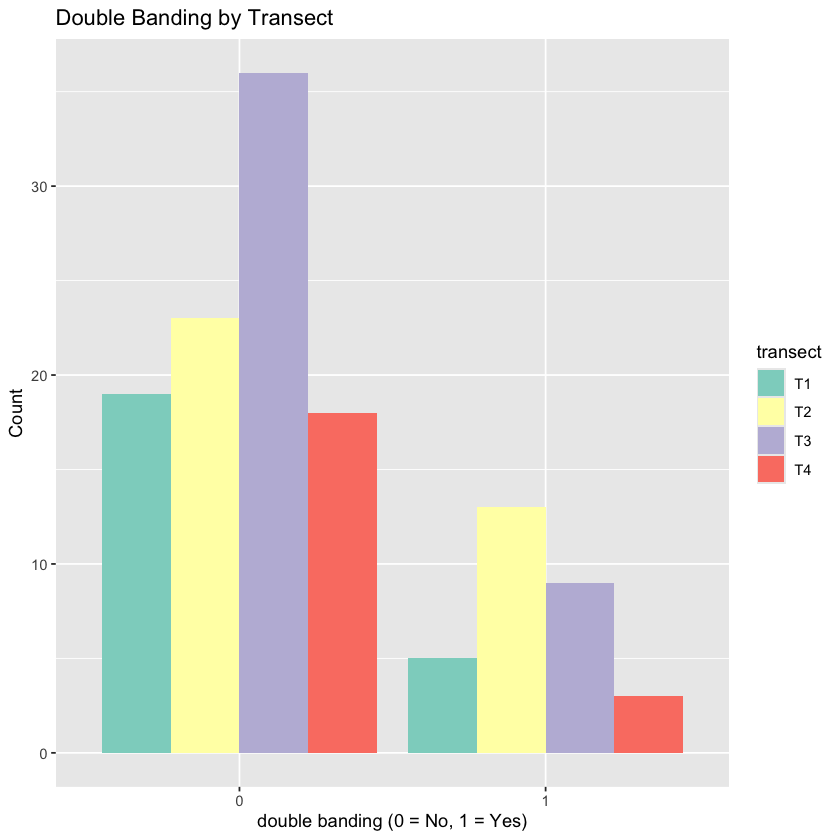

In [23]:
ggplot(pcr_clean, aes(x = factor(double_binary), fill = transect)) +
  geom_bar(position = "dodge") +
  labs(x = "double banding (0 = No, 1 = Yes)", y = "Count", title = "Double Banding by Transect") +
  scale_fill_brewer(palette = "Set3")

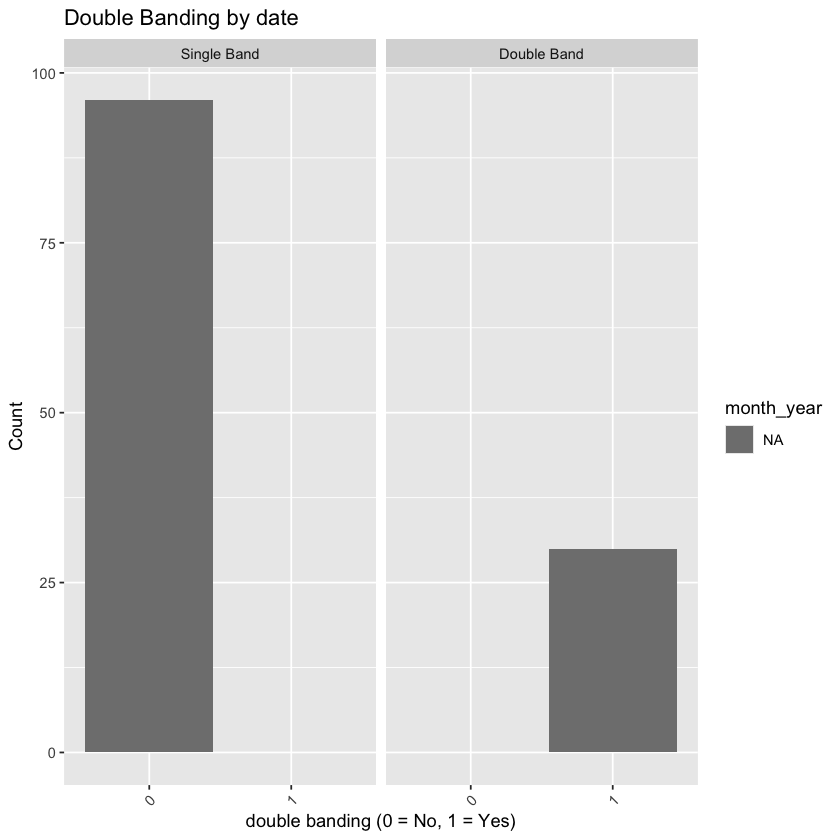

In [31]:
ggplot(pcr_clean, aes(x = factor(double_binary), fill = month_year)) +
  geom_bar(position = "dodge") +
  labs(x = "double banding (0 = No, 1 = Yes)", y = "Count", title = "Double Banding by date") +
  facet_wrap(~ double_binary, labeller = labeller(double_binary = c(`0` = "Single Band", `1` = "Double Band"))) +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

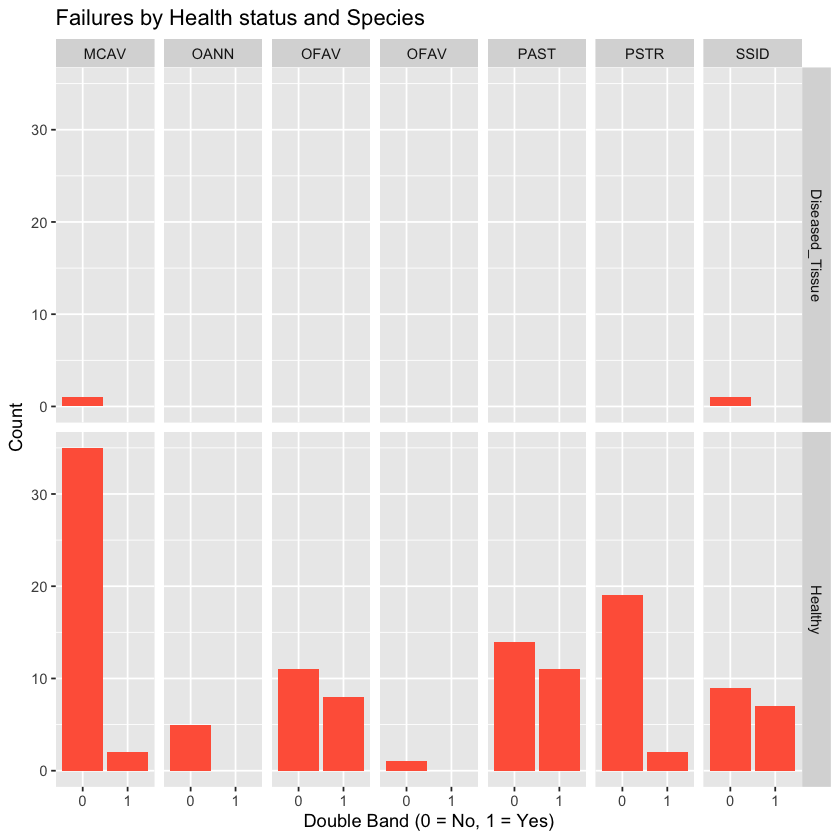

In [22]:
#species and transect
ggplot(pcr_clean, aes(x = factor(double_binary))) +
  geom_bar(fill = "tomato") +
  facet_grid(Health_Status ~ species) +
  labs(x = "Double Band (0 = No, 1 = Yes)", y = "Count", title = "Failures by Health status and Species")
